## Máquina de soporte vectorial

Vladimir N. Vapnik y Alexey Ya. Chervonenkis en 1963 propusieron el nodelo  SVM. El objetivo de una  SVM es dibujar un hiperplano que separe  dos clases óptimamente tal que el margen es máximo entre el hiperplano y las observaciones.

![](SVM1.png)

Las máquinas vectoriales de soporte (SVMs) son una clase particularmente potente y flexible de algoritmos supervisados tanto para la clasificación como para la regresión. Aquí desarrollaremos la idea  detrás de las máquinas vectoriales de soporte y su uso en problemas de clasificación.



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Usamos el paquete grafico de seaborn
import seaborn as sns; sns.set()

Aquí vamos a considerar la `clasificación discriminativa`, es decir,  en vez de modelar cada clase, simplemente encontramos una línea o curva (en dos dimensiones) o múltiple (en múltiples dimensiones) que divide las clases entre sí. 

A diferencia  por ejemplo del contexto de la  clasificación Bayesiana donde un modelo  describe la distribución de cada clase subyacente y utiliza  `modelos generativos` para determinar probabilísticamente etiquetas para nuevos puntos, `clasificación generativa`.

Como ejemplo de esto, consideramos el caso  de una tarea de clasificación, en la cual las dos clases de puntos están bien separadas. 

* Lectura : [Plot randomly generated classification dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html).

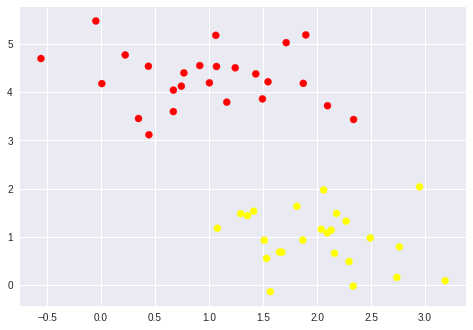

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Un clasificador lineal discriminativo traza una línea recta que separara los dos conjuntos de datos, y de ese modo crearía un modelo para la clasificación. Para datos bidimensionales como los mostrados aquí, esta es una tarea que podríamos hacer a mano. Pero inmediatamente vemos un problema: hay más de una posible línea divisoria que puede discriminar perfectamente entre las dos clases. 

Veamos un gráfico:

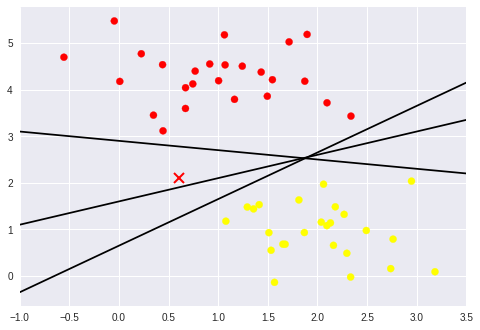

In [3]:
x_fijado = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(x_fijado, m * x_fijado + b, '-k')

plt.xlim(-1, 3.5);

Estos son tres separadores muy diferentes que, sin embargo, discriminan perfectamente entre estas muestras. Dependiendo de lo que elija, un nuevo punto de datos (por ejemplo, el marcado con la "X" en esta gráfica) se le asignará una etiqueta diferente.

###  Maximización del margen

Máquinas de soporte vectorial  ofrecen una manera de mejorar  esto. La intuición es ésta: en lugar de dibujar simplemente una línea de ancho cero entre las clases, podemos dibujar alrededor de cada línea un `margen` de algún ancho, hasta el punto más cercano. He aquí un ejemplo de cómo esto podría parecer:

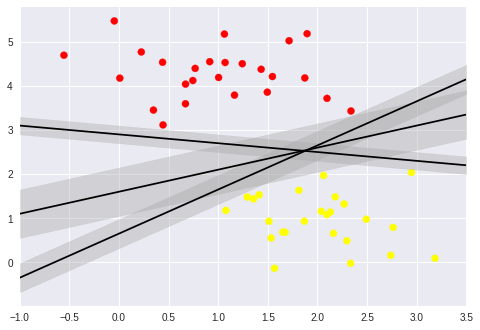

In [4]:
x_fijado = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    y_fijado = m * x_fijado + b
    plt.plot(x_fijado, y_fijado, '-k')
    plt.fill_between(x_fijado, y_fijado - d, y_fijado + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

En máquinas de soporte  vectorial, la línea que maximiza este margen es la que elegiremos como el modelo óptimo. Las máquinas vectoriales de soporte son un ejemplo de un estimador de margen máximo.

###  Fijando una máquina de soporte  vectorial

Veamos el resultado de un ajuste real a estos datos: usaremos el clasificador de vectores de soporte de Scikit-Learn para entrenar un modelo SVM con estos datos. Por el momento, usaremos un kernel lineal y estableceremos el parámetro C en un número muy grande.

* Lectura: [Support Vector Machines](http://scikit-learn.org/stable/modules/svm.html).

In [5]:
# Clasificador de soporte vectorial

from sklearn.svm import SVC  
modelo = SVC(kernel='linear', C=1E10)
modelo.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Para visualizar mejor lo que está sucediendo aquí, vamos a crear una función que dibujará los límites de decisión SVM:

In [6]:
def dibujo_funcion_decision_svc(modelo, ax=None, dibujo_soporte=True):
    
    """Dibujo de la funcion de decision para un SVC 2D """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # creamos una cuadricula para evaluar el modelo
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = modelo.decision_function(xy).reshape(X.shape)
    
    # Dibujando los limites de decision y margenes
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    
    # Dibujando vectores de soporte
    
    if dibujo_soporte:
        ax.scatter(modelo.support_vectors_[:, 0],
                   modelo.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='green');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


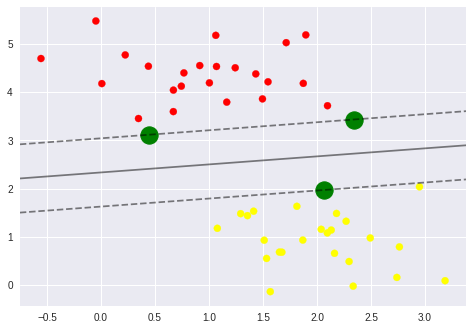

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
dibujo_funcion_decision_svc(modelo)

Esta es la línea divisoria que maximiza el margen entre los dos conjuntos de puntos. Debes observar que algunos de los puntos de entrenamiento sólo tocan el margen: están indicados por los círculos verdes  en la figura.

Estos puntos son los elementos fundamentales de este ajuste, y se conocen como  `vectores de soporte`.  En Scikit-learn, la identidad de estos puntos se almacena en el atributo `support_vectors_` del clasificador:

In [8]:
modelo.support_vectors_


array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

Una clave para el éxito de este clasificador es que para el ajuste, sólo la posición de los vectores de soporte importa; cualquiera de los puntos más lejos del margen que están en el lado correcto no modifica el ajuste!. Esto se debe a que estos puntos no contribuyen a la función de pérdida utilizada para ajustar el modelo, por lo que su posición y número no importan, siempre y cuando no atraviesen el margen.

Podemos ver esto, por ejemplo, dibujemos el modelo aprendido de los primeros 80 puntos y los primeros 160 puntos de este conjunto de datos:

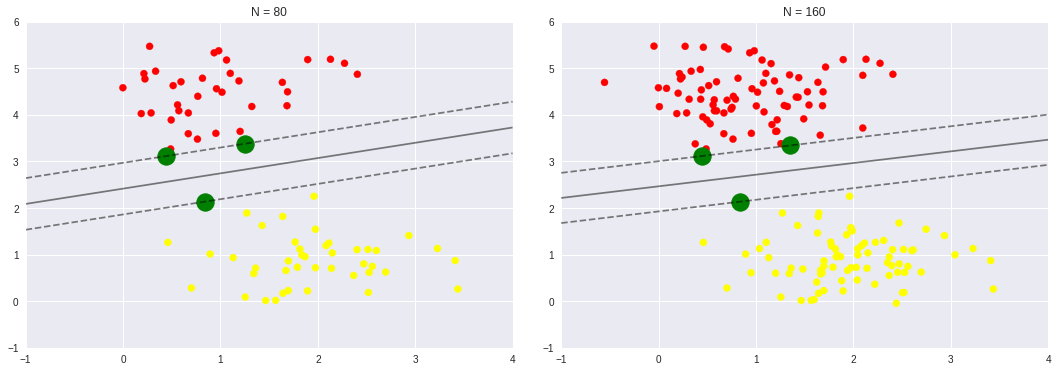

In [9]:
def dibujo_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    modelo = SVC(kernel='linear', C=1E10)
    modelo.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    dibujo_funcion_decision_svc(modelo, ax)
    
    

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [80, 160]):
    dibujo_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

En el panel izquierdo, vemos el modelo y los vectores de soporte para 80 puntos de entrenamiento. En el panel derecho, hemos duplicado el número de puntos de entrenamiento, pero el modelo no ha cambiado: los tres vectores de soporte del panel izquierdo siguen siendo los vectores de soporte del panel derecho.

Esta insensibilidad al comportamiento exacto de los puntos distantes es una de las fortalezas del modelo SVM.

Podemos utilizar los widgets interactivos de Jupyter para ver esta característica del modelo SVM de forma interactiva:

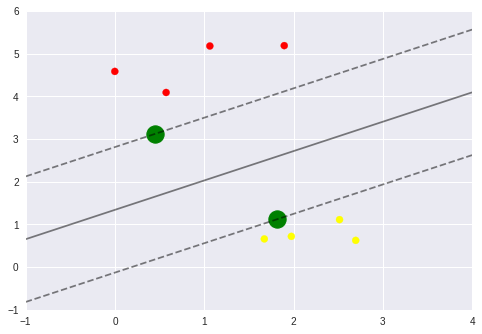

In [10]:
from ipywidgets import interact, fixed
interact(dibujo_svm, N=[10, 200], ax=fixed(None));

### El modelo de máquina de soporte vectorial 

In [11]:
from sklearn import datasets
import pandas as pd
from sklearn import tree
from sklearn import metrics
from matplotlib.colors import ListedColormap # Usamos matplotlib

iris = datasets.load_iris()

* Cargando el conjunto de datos  de `iris` desde `scikit-learn`. Aquí, la tercera columna representa la longitud del pétalo, y la cuarta columna la anchura del pétalo de las muestras de la flor. Las clases ya están convertidas en etiquetas enteras donde `0 = Iris-Setosa`, `1 = Iris-Versicolor`, `2 = Iris-Virginica`.

In [12]:
X = iris.data[:, [2, 3]]
y = iris.target

print('Etiquetas de clases:', np.unique(y))

Etiquetas de clases: [0 1 2]


* Normalizamos datos: la unidad de medida puede ser diferente, así que normalizamos  los datos antes de construir el modelo.

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

* Dividimos los datos de entrenamiento  y de prueba. Cuando alguna vez estamos utilizando la función aleatoria es aconsejable utilizar una semilla para asegurar la reproducibilidad de los resultados.

In [14]:
# Dividimos los datos de entrenamiento y prueba 

from sklearn.model_selection import train_test_split
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
def dibujo_regiones_decision(X, y, clasificador):
    
    h = .02 
    marcadores = ('s', 'x', 'o', '^', 'v')
    colors = ('orange', 'gray', 'blue', 'yellow', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Dibujamos las superficies de decision
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=marcadores[idx], label=cl)

* Utilizamos un clasicador para SVM

Lecturas: 

   - [Matriz de confusion](https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n).
   - [sklearn.svm.LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [16]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(X_entrenamiento, y_entrenamiento)

# Generamos metricas de evaluacion

print("Entrenamiento-Precision :", metrics.accuracy_score(y_entrenamiento, clf.predict(X_entrenamiento)))
print("Entrenamiento-Matriz confusion:",metrics.confusion_matrix(y_entrenamiento, clf.predict(X_entrenamiento)))
print("Entrenamiento-Reporte de clasificacion :", 
       metrics.classification_report(y_entrenamiento, clf.predict(X_entrenamiento)))

print("Prueba-Precision:", metrics.accuracy_score(y_prueba, clf.predict(X_prueba)))
print("Prueba-Matriz confusion :",metrics.confusion_matrix(y_prueba, clf.predict(X_prueba)))
print("Prueba-Reporte de clasificacion :", metrics.classification_report(y_prueba, clf.predict(X_prueba)))

Entrenamiento-Precision : 0.952380952381
Entrenamiento-Matriz confusion: [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Entrenamiento-Reporte de clasificacion :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.91      0.94      0.92        32
          2       0.95      0.92      0.94        39

avg / total       0.95      0.95      0.95       105

Prueba-Precision: 0.977777777778
Prueba-Matriz confusion : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Prueba-Reporte de clasificacion :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



* Dibujamos los límite de decisión considerando un ejemplo de dos clases.

In [17]:
# Utilizamos  la función make_classification para crear algunos datos de prueba.

from sklearn.datasets import make_classification
X, y = make_classification(100, 2, 2, 0, weights=[.5, .5], random_state=0) 

# Fijamos un modelo de regresion simple

clf = SVC(kernel='linear', random_state=0)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

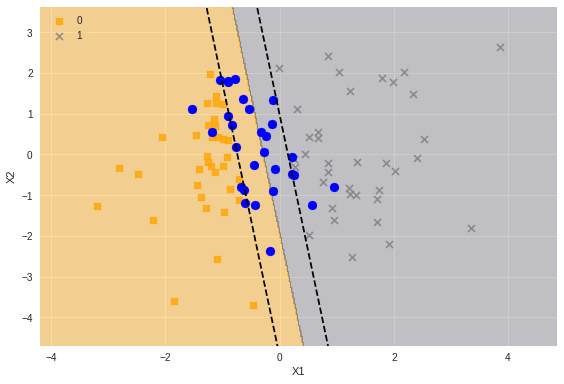

In [18]:
# Obtenemos el hiperplano de separación

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Dibujamos los paralelos al hiperplano de separación que pasa a través de los vectores de soporte

b = clf.support_vectors_[0]
yy_abajo = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_arriba = a * xx + (b[1] - a * b[0])

# Dibujamos los limites de decision

dibujo_regiones_decision(X, y, clasificador=clf)

# Dibujamos la línea, los puntos y los vectores más cercanos al plano

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='blue')
plt.plot(xx, yy_abajo, 'k--')
plt.plot(xx, yy_arriba, 'k--')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()